<a href="https://colab.research.google.com/github/Somyadhariwal/SD_MLAP/blob/main/2_Somya_Dhariwal_20A1HP033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question No 2: HR Dataset
Somya Dhariwal
20A1HP033

In [7]:
#importing the usual suspects
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/rssmahesh1/MLAP2021Exam/main/MALP2021%20Question%20paper/HR_data.csv")
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Looking for nulls and cleaning


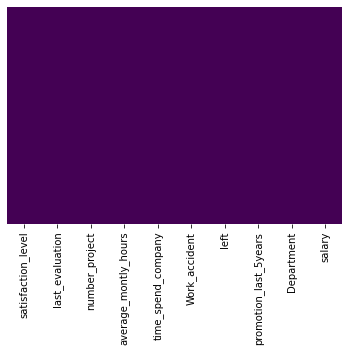

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

Safe to assume no nulls in dataset

In [11]:
df[df.isnull()].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

EDA

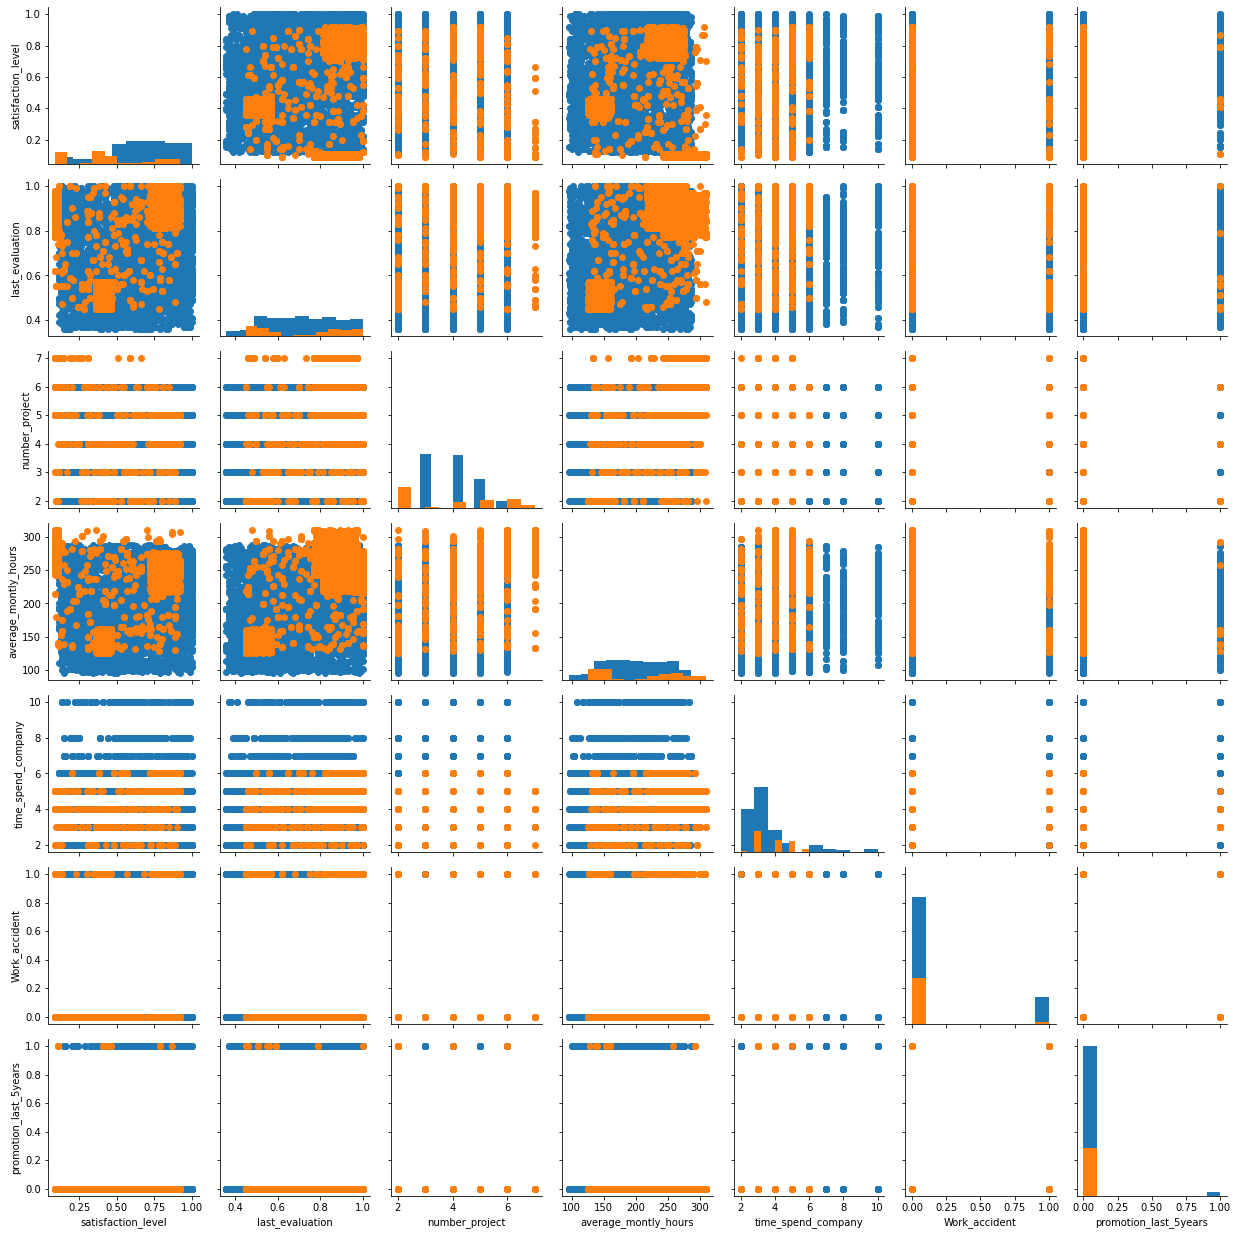

In [12]:
g = sns.PairGrid(df,hue='left')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

Too many categorical variables to gain any insights

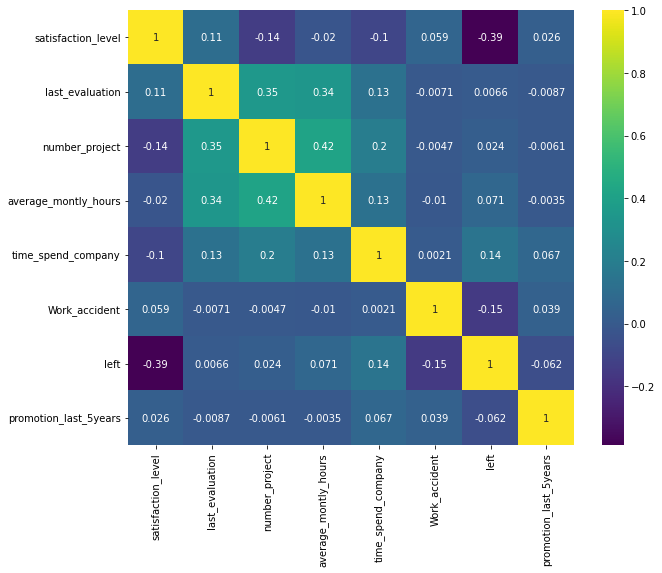

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

as per the above evaluation,average monthly hours, and number of projects had higher (in this context) correlations with each other than the other variables. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


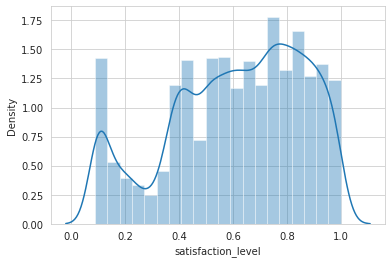

In [14]:
sns.set_style('whitegrid')
sns.distplot(df['satisfaction_level'],bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


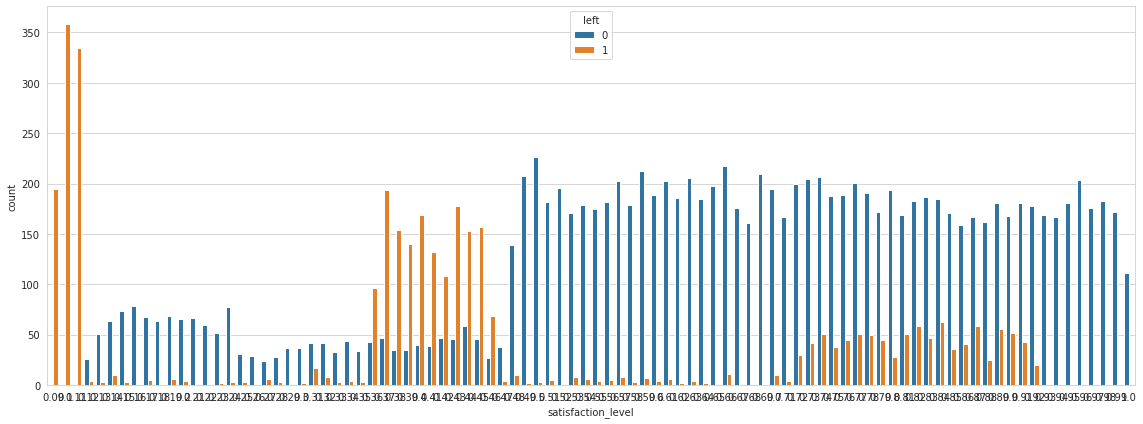

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(df['satisfaction_level'],hue=df['left'])
plt.tight_layout()

Job satisfaction looks like it is varied. we can guess that, people with very low job satisfaction seemed to have left. Interesting thing is that those with 35-47 satisfaction levels leave at a very large rate. This rate then plummets, then jumps up again around 70-90 at around 20-25%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


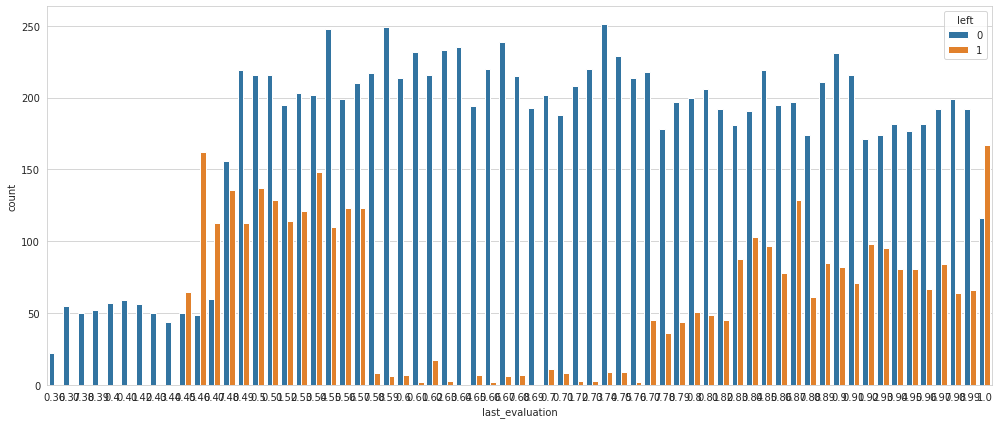

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(df['last_evaluation'],hue=df['left'])
plt.tight_layout()

There is similar distribution in this graph as the satisfaction level. The ones with last evaluations of 40-57 tend to leave, as they might want to go somewhere they have better chance of succeeding. Those with high evaluations seem to leave as well, it appears they gain confidence and look for places to move up.

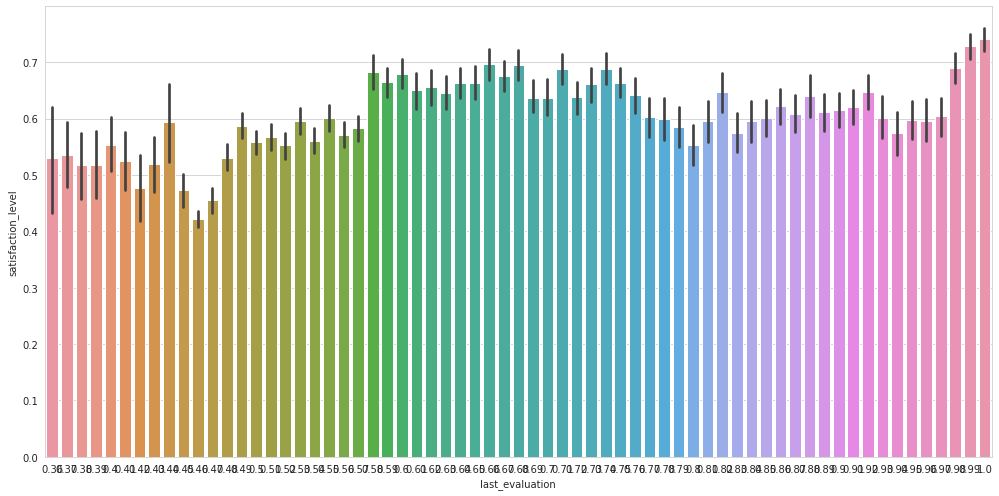

In [17]:
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['last_evaluation'],y=df['satisfaction_level'])
plt.tight_layout()

those with high evals tend to have higher satisfaction

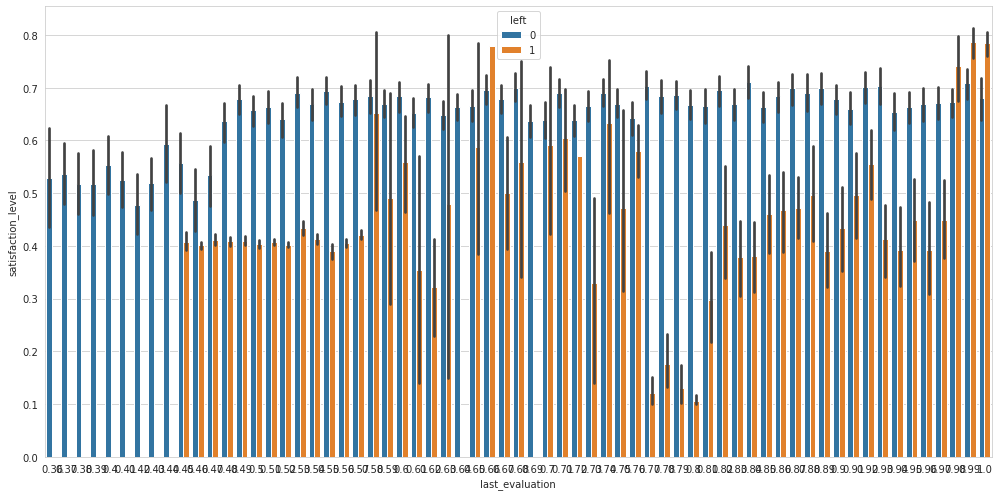

In [18]:
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['last_evaluation'],y=df['satisfaction_level'],hue=df['left'])
plt.tight_layout()

Those with super low evals stayed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


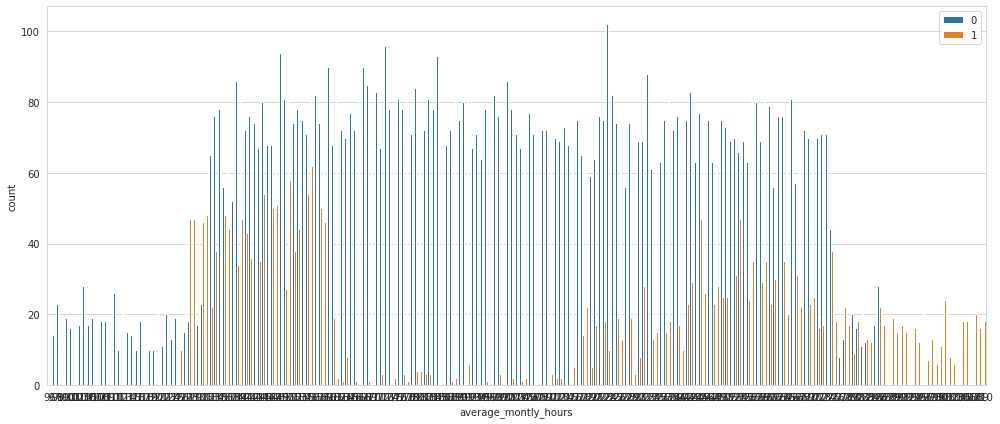

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(df['average_montly_hours'],hue=df['left'])
plt.tight_layout()
plt.legend(loc=1)

This chart has a similar distribution as those above. Those with high hours leave in high rates, just as those with low hours do.

Looking at other features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


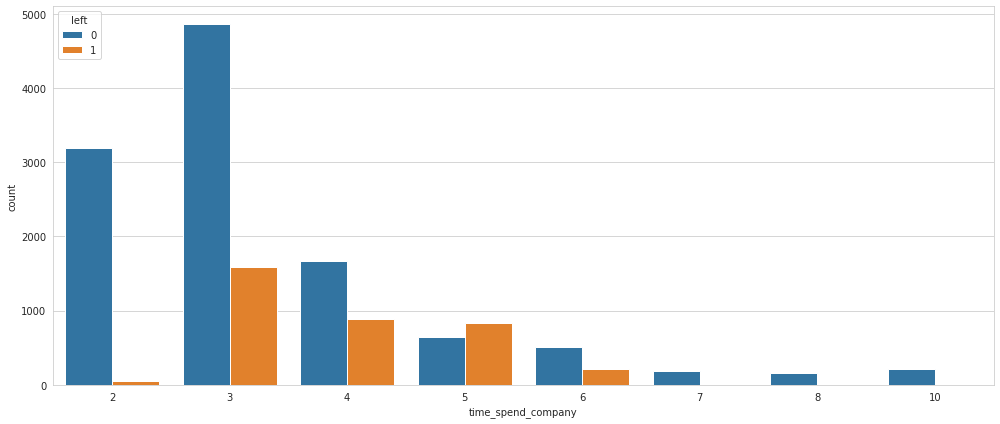

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(df['time_spend_company'],hue=df['left'])
plt.tight_layout()

Around 3-5 years spent at company people start leaving.
Small sample size but such low numbers for 7,8,9 suggest people earn some experience(3-5 yrs) then leave or swap.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


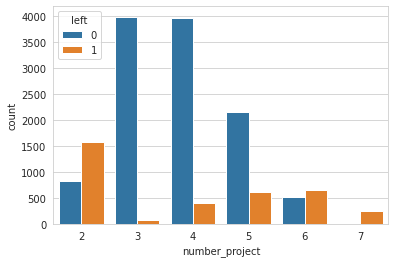

In [21]:
sns.countplot(df['number_project'],hue=df['left'])

People with low (2) or high numbers(6,7) of projects tend to leave.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


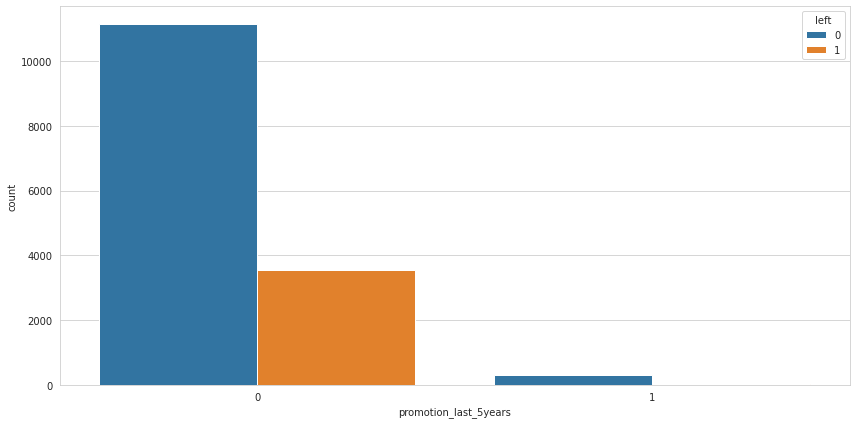

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df['promotion_last_5years'],hue=df['left'])
plt.tight_layout()

Low Promotion rates

In [24]:
df[df['promotion_last_5years']==1].count()

satisfaction_level       319
last_evaluation          319
number_project           319
average_montly_hours     319
time_spend_company       319
Work_accident            319
left                     319
promotion_last_5years    319
Department               319
salary                   319
dtype: int64

In [25]:
df[(df['promotion_last_5years']==1) & (df['left']==1)].count()


satisfaction_level       19
last_evaluation          19
number_project           19
average_montly_hours     19
time_spend_company       19
Work_accident            19
left                     19
promotion_last_5years    19
Department               19
salary                   19
dtype: int64

In [26]:
#Proportion of those with promotion that left
print((19.0/310)*100)

6.129032258064516


In [27]:
df[df['promotion_last_5years']==0].count()

satisfaction_level       14680
last_evaluation          14680
number_project           14680
average_montly_hours     14680
time_spend_company       14680
Work_accident            14680
left                     14680
promotion_last_5years    14680
Department               14680
salary                   14680
dtype: int64

In [28]:
df[(df['promotion_last_5years']==0) & (df['left']==1)].count()

satisfaction_level       3552
last_evaluation          3552
number_project           3552
average_montly_hours     3552
time_spend_company       3552
Work_accident            3552
left                     3552
promotion_last_5years    3552
Department               3552
salary                   3552
dtype: int64

In [29]:
#Proportion of those without promotion that left
print((3552.0/14680)*100)

24.196185286103542


whether or not they got a promotion seems to be factor in leaving. If tested, it would probably be significant.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


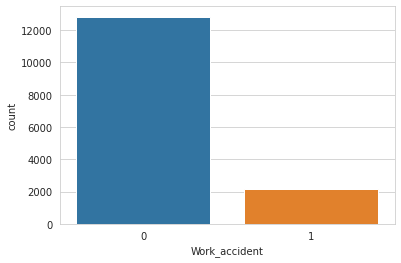

In [30]:
sns.countplot(df['Work_accident'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


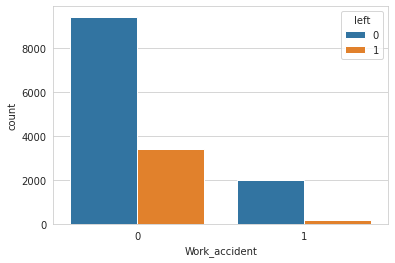

In [31]:
sns.countplot(df['Work_accident'],hue=df['left'])

Those with work accidents seem to be more loyal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


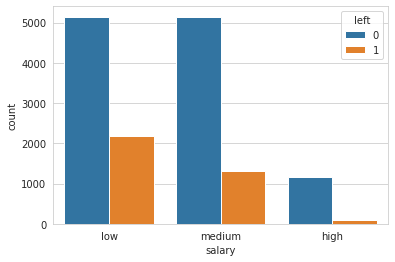

In [32]:
#low salaried workers seems to have a higher rate of leaving
#obvious but worth looking into
sns.countplot(df['salary'],hue=df['left'])

In [33]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [34]:
def sal_class(x):
    if x == "low":
        return 1
    elif x == "medium":
        return 2
    elif x == "high":
        return 3

In [35]:
df['sal_class'] = df['salary'].apply(sal_class)

In [36]:
df['sal_class'].value_counts()

1    7316
2    6446
3    1237
Name: sal_class, dtype: int64

Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

Designation of X and Y values

In [44]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours',
        'time_spend_company','Work_accident','promotion_last_5years','sal_class']]
y = df['left']

Splitting the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
logmodel = LogisticRegression()

Fitting the model

In [48]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3431
           1       0.60      0.36      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

[[3177  254]
 [ 685  384]]


dump job class, as it didn't seem to be significant. dump time spent at company as well

In [51]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours',
       'promotion_last_5years','sal_class','Work_accident']]
y = df['left']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3431
           1       0.66      0.37      0.47      1069

    accuracy                           0.80      4500
   macro avg       0.74      0.65      0.68      4500
weighted avg       0.79      0.80      0.78      4500

[[3228  203]
 [ 678  391]]


take out promotion last 5 years and last evaluation

In [55]:
X = df[['satisfaction_level','number_project','average_montly_hours',
       'sal_class','Work_accident']]
y = df['left']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3431
           1       0.68      0.38      0.49      1069

    accuracy                           0.81      4500
   macro avg       0.75      0.66      0.69      4500
weighted avg       0.79      0.81      0.79      4500

[[3238  193]
 [ 662  407]]


Let's take out average monthly hours as well.

In [59]:
X = df[['satisfaction_level','number_project',
       'sal_class','Work_accident']]
y = df['left']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predictions = logmodel.predict(X_test)


In [62]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3431
           1       0.71      0.45      0.55      1069

    accuracy                           0.83      4500
   macro avg       0.78      0.70      0.72      4500
weighted avg       0.81      0.83      0.81      4500

[[3238  193]
 [ 589  480]]
